# Text Abstractions: Articles Skimming

In [1]:
# Importing TF and checking the version
import tensorflow as tf

print(tf.__version__)

2.10.1


Re-using PubMed dataset, published by Franck Dernoncourt. Dataset contains 20K records, with numbers replaced by "@" sign.

In [2]:
# Checking all the file names in the target directory
import os

data_dir = "PubMed_20K_RCT_NumReplaced/"
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['PubMed_20K_RCT_NumReplaced/dev.txt',
 'PubMed_20K_RCT_NumReplaced/test.txt',
 'PubMed_20K_RCT_NumReplaced/train.txt']

In [3]:
# Creating function to read lines of code
def get_lines(filename):
    with open(filename, "r") as f:
        return f.readlines()

In [4]:
# Reading train file lines
train_lines = get_lines(data_dir + "train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [5]:
# Checking number of lines
len(train_lines)

210040

In [6]:
# Creating function to preprocess input texts
def preprocess_text_with_line_numbers(filename):
    input_lines = get_lines(filename)
    abstract_lines = "" # Creating empty abstract
    abstract_samples = [] # Creating empty list of abstracts

    for line in input_lines:
        if line.startswith("###"): # Check if it's an ID line
            abstract_id = line
            abstract_lines = "" # Reset if line is an ID line

        elif line.isspace(): # Check if it's a new line
            abstract_line_split = abstract_lines.splitlines()
            # Iterating through each line
            for abstract_line_number, abstract_line in enumerate(abstract_line_split):
                line_data = {} # Create empty dictionary for each line
                target_text_split = abstract_line.split("\t")
                line_data["target"] = target_text_split[0] # Get target label
                line_data["text"] = target_text_split[1].lower() # Get target text
                line_data["line_number"] = abstract_line_number # What line text appears on
                line_data["total_lines"] = len(abstract_line_split) - 1 # How many lines are there
                abstract_samples.append(line_data)

        else:
            abstract_lines += line
    
    return abstract_samples

In [7]:
# Getting and preprocessing data
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
print(len(train_samples), len(val_samples), len(test_samples))

180040 30212 30135


In [8]:
# Checking first abstract of train samples
train_samples[:14]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [9]:
# Checking the output
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [10]:
# Checking distribution of labels
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<AxesSubplot:ylabel='Frequency'>

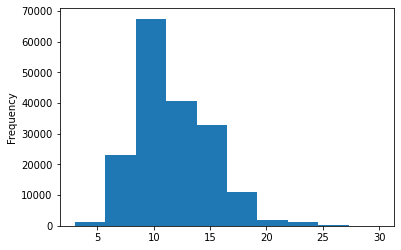

In [11]:
# Checking length of differnt lines
train_df.total_lines.plot.hist()

### Get list of sentences

In [12]:
# Converting abstract textx into lists
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()

len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [13]:
# Viewing first 10 train sentences
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

### Make numeric labels

In [14]:
# One-hot labels
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [15]:
# Converting into tensor
tf.constant(train_labels_one_hot)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

In [16]:
# Extract labels and encode them into integers
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [17]:
# Getting class names
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

### Model 0 - Baseline model

In [18]:
# Building baseline model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())    
])

# Fitting the pipeline
model_0.fit(
    X=train_sentences,
    y=train_labels_encoded
)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [19]:
# Evaluating the baseline model
model_0.score(
    X=val_sentences,
    y=val_labels_encoded
)

0.7218323844829869

In [20]:
# Making predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [21]:
# Doanload helpder function
from DanielBourke_HelperFunctions import calculate_results

In [22]:
# Calculate baseline results
baseline_results = calculate_results(
    y_true=val_labels_encoded,
    y_pred=baseline_preds
)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

### Preparing data for the deep sequence models

In [23]:
# Getting required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [24]:
# How long is each sequence on average
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_lens = np.mean(sent_lens)
avg_sent_lens

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

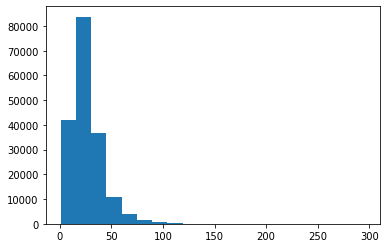

In [25]:
# Visualising sentence distribution
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=20)

In [26]:
# Identifying what length covers 95% of all samples
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [27]:
# Maximum sentence length
max(sent_lens)

296

In [28]:
# Setting max token numbers
max_tokens = 68000

In [29]:
# Create text vectoriser
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectoriser = TextVectorization(
    max_tokens=max_tokens, # Number of words in vocabulary
    output_sequence_length=output_seq_len # Desired output length of vectorised sequences
)

In [30]:
# Adapt text vectoriser to training sentences
text_vectoriser.adapt(train_sentences)

In [32]:
# Test vectoriser on random sentences
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"Length of text: {len(target_sentence.split())}")
print(f"Verctorised text: {text_vectoriser([target_sentence])}")

Text:
we investigated the modification of vorapaxar 's effect associated with clopidogrel use over time .
Length of text: 15
Verctorised text: [[  43  446    2 2410    4 6134  130   70   81    7 1255   87  145   63
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [34]:
# Number of words in training vocabulary
rct_20k_text_vocab = text_vectoriser.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_text_vocab)}")
print(f"5 most common words: {rct_20k_text_vocab[:5]}")
print(f"5 least common words: {rct_20k_text_vocab[-5:]}")

Number of words in vocab: 64841
5 most common words: ['', '[UNK]', 'the', 'and', 'of']
5 least common words: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [35]:
# Getting config of text vectoriser
text_vectoriser.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

### Custom text embedding

In [36]:
# Creating token embedding layer
token_embed = layers.Embedding(
    input_dim=len(rct_20k_text_vocab),
    output_dim=128,
    mask_zero=True,
    name="token_embedding"
)

In [37]:
# Showing example of embedding
print(f"Sentence before embedding:\n{target_sentence}")
vectorised_sentence = text_vectoriser([target_sentence])
print(f"Sentence after vectorisation:\n{vectorised_sentence}")
embedded_sentence = token_embed(vectorised_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}")
print(f"Embedded sentence's shape: {embedded_sentence.shape}")

Sentence before embedding:
we investigated the modification of vorapaxar 's effect associated with clopidogrel use over time .
Sentence after vectorisation:
[[  43  446    2 2410    4 6134  130   70   81    7 1255   87  145   63
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]
Sentence after embedding:
[[[ 0.0372518   0.04926953 -0.02685085 ...  0.0377542   0.02466365
    0.0126449 ]
  [-0.00252237  0.0186201   0.00485115 ... -0.04822942 -0.04354487
    0.00618257]
  [-0.04375832  0.03855376  0.01862787 ... -0.01967942  0.04723367
   -0.04722648]
  ...
  [ 0.037165   -0.04113294 -0.02666913 ... -0.02970588  0.00039425
   -0.02808015]
  [ 0.037165   -0.04113294 -0.02666913 ... -0.02970588  0.00039425
   -0.02808015]
  [ 0.037165   -0.04113294 -0.02666913 ... -0.02970588  0.00039425
   -0.02808015]]]
Embedded sentence's shape:

### Creating datasets

In [38]:
# Turning data into TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    train_sentences,
    train_labels_one_hot
))

valid_dataset = tf.data.Dataset.from_tensor_slices((
    val_sentences,
    val_labels_one_hot
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    test_sentences,
    test_labels_one_hot
))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [39]:
# Shape and sample of train labels
train_labels_one_hot.shape, train_labels_one_hot[0]

((180040, 5), array([0., 0., 0., 1., 0.]))

In [43]:
# Turn dataset into prefetched one
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, None), dtype=tf.string, name=None), TensorSpec(shape=(None, None, None, None, 5), dtype=tf.float64, name=None))>